In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# leemos nuestro fichero despues de haberlo modificado
df = pd.read_csv('basilea_dataframe.csv')
print(df)

                    date  temp_in_Basilea  Basilea.1
0       01-01-2008/01:00        -0.109471        0.0
1       01-01-2008/02:00         1.900529        0.0
2       01-01-2008/03:00         1.610529        0.0
3       01-01-2008/04:00         1.110529        0.0
4       01-01-2008/05:00         0.820529        0.0
...                  ...              ...        ...
130050  01-11-2022/19:00        14.560529        0.0
130051  01-11-2022/20:00        14.500529        0.0
130052  01-11-2022/21:00        13.830529        0.0
130053  01-11-2022/22:00        13.200529        0.0
130054  01-11-2022/23:00        12.740529        0.0

[130055 rows x 3 columns]


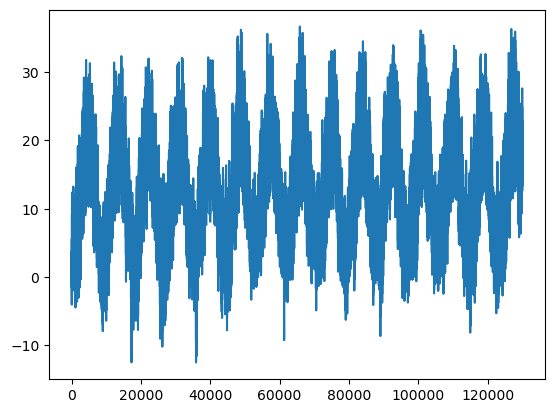

In [4]:

plt.plot(df['temp_in_Basilea']) #This would be the initial graph
# (y = temperature, x = datapoints)
plt.show()

In [5]:
# 3. Hacer un gráfico donde podamos ver ambas variables y el lector pueda leer y entender lo que está ploteado. 

In [6]:
#No es posible mostrar x numero de datapoints como dates, asi que utilizaremos como eje x
# el primer dia de cada año

In [7]:
# 4. Calcular la media anual y plotearla en el gráfico anterior.
mean_temperature =df['temp_in_Basilea'].mean()
print(mean_temperature)

12.30105480914607


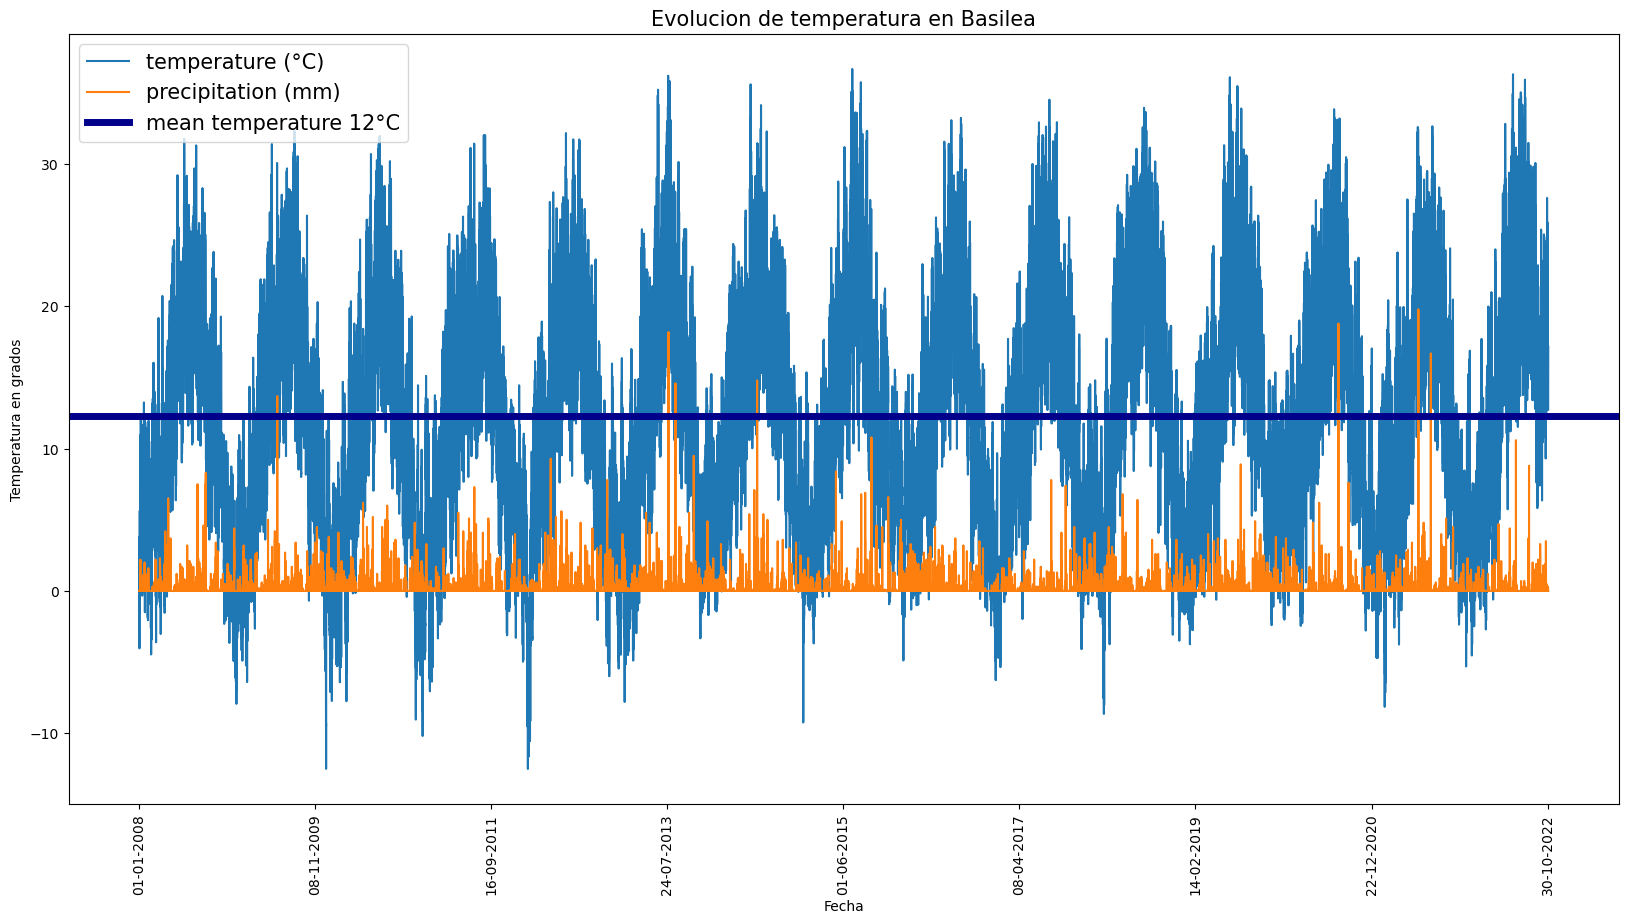

Wall time: 353 ms


In [8]:
%%time
# creamos una lista que tenga los indices de la fecha, y luego localizamos esa fecha
def only_year(s):
    return s[:10]
def lista_years_name():
    result = []
    for i in range(9):
        value = 16250*i
        result.append(only_year(df.loc[value]['date']))
    return result
def value():
    result = []
    for i in range(9):
        value = 16250*i
        result.append(value)
    return result
       
# hacemos la grafica mas grande
plt.figure(figsize=(20,10))        
# ploteamos la temperatura, color predeterminado        
plt.plot(df['temp_in_Basilea'], linestyle = '-', label='temperature (°C)')
# ploteamos la precipitacion, color predeterminado
plt.plot(df['Basilea.1'], label='precipitation (mm)')
# ploteamos la media en forma de recta
plt.axhline(y=mean_temperature, linewidth = 5, c = 'darkblue', label='mean temperature ' + str(round(mean_temperature)) + '°C')
# le ponemos titulo a la grafica
plt.title('Evolucion de temperatura en Basilea', fontsize=15)
# seteamos el eje x con un numero, cuyo numero indica la fecha
plt.xticks(value(),lista_years_name(),rotation=90)
# utilizamos legend para marcar lo que encontramos en la grafica
plt.legend(loc='upper left', fontsize=15)
# le damos valor al eje x y al eje y
plt.ylabel('Temperatura en grados')
plt.xlabel('Fecha')
plt.show()

In [9]:
# marcaremos cada fecha como el 1 de enero de cada año
def lookinto():
    result = []
    count = 0
    for x in df['date']:
        y = only_year(x)
        if x[0:5] == '01-01' and x[-5:]=='00:00':
            result.append(y)
    return result
print(lookinto())

['01-01-2009', '01-01-2010', '01-01-2011', '01-01-2012', '01-01-2013', '01-01-2014', '01-01-2015', '01-01-2016', '01-01-2017', '01-01-2018', '01-01-2019', '01-01-2020', '01-01-2021', '01-01-2022']


[0, 8784, 17568, 26352, 35136, 43920, 52704, 61488, 70272, 79056, 87840, 96624, 105408, 114192]
True


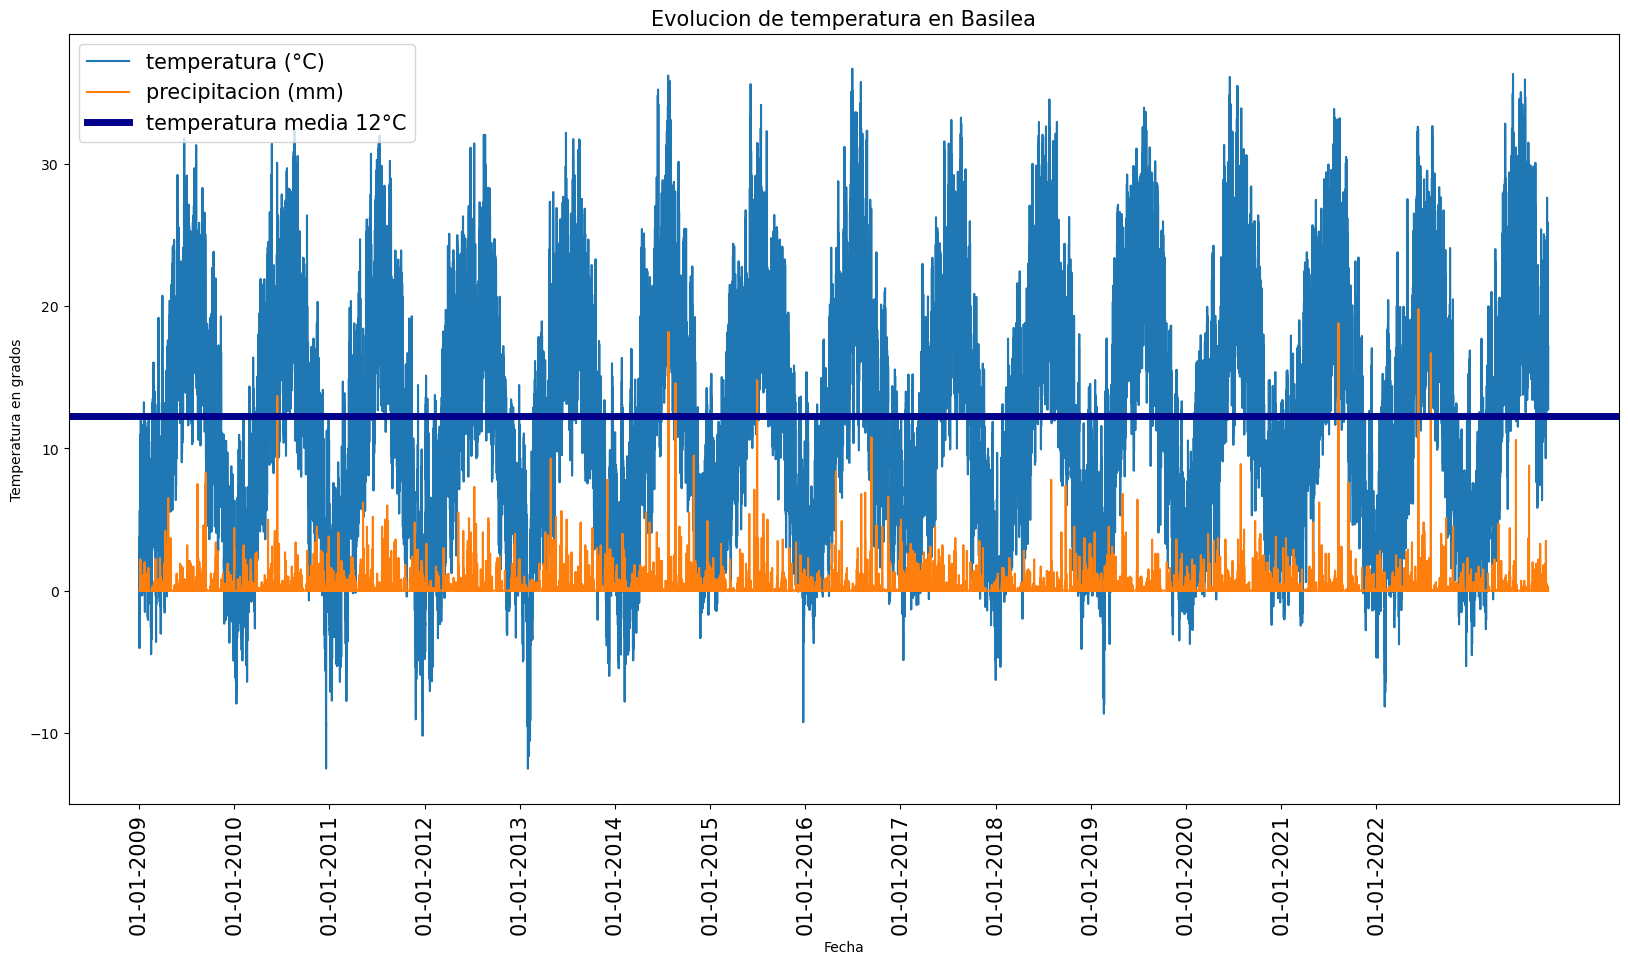

Wall time: 463 ms


In [10]:
%%time

def only_year(s):
    return s[:10]
def lista_years_name():
    result = []
    for i in range(9):
        value = 16250*i
        result.append(only_year(df.loc[value]['date']))
    return result
# modificamos la funcion de 'value' para que nos marque un indice cada vez que sea nuevo año (espacio entre año y año aprox = 8784)
def value():
    result = []
    for i in range(14):
        value = 8784*i
        result.append(value)
    return result
print(value())
print(len(value())==len(lookinto())) # esto se cumple porque la longitud de los indices de cada una de las fechas es igual a la longitud de la lista de fechas.
nueva_lista = lookinto()

plt.figure(figsize=(20,10))                
plt.plot(df['temp_in_Basilea'], linestyle = '-', label='temperatura (°C)')
plt.plot(df['Basilea.1'], label='precipitacion (mm)')
plt.axhline(y=mean_temperature, linewidth = 5, c = 'darkblue', label='temperatura media ' + str(round(mean_temperature)) + '°C')
plt.title('Evolucion de temperatura en Basilea', fontsize=15)
# seteamos el eje x con la longitud de la nueva lista cuyo numero indica el primer dia de cada año
plt.xticks(value(),lookinto(),rotation=90,fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.ylabel('Temperatura en grados')
plt.xlabel('Fecha')
plt.show()

In [11]:
# 5. Buscar valores anormales, ¿cómo? Barras de error confianza del 95% e identificar qué valores 
# se salen de esas barras.

In [12]:
rango = df['temp_in_Basilea'].max() - df['temp_in_Basilea'].min()
print(rango)

49.219998000000004


In [13]:
error_bars = round(rango)*0.95
print(error_bars)

46.55


In [14]:
# barras por arriba
ds = (error_bars/2) + mean_temperature
# barras por abajo
di = mean_temperature - (error_bars/2)
print(ds,di)

35.57605480914607 -10.973945190853929


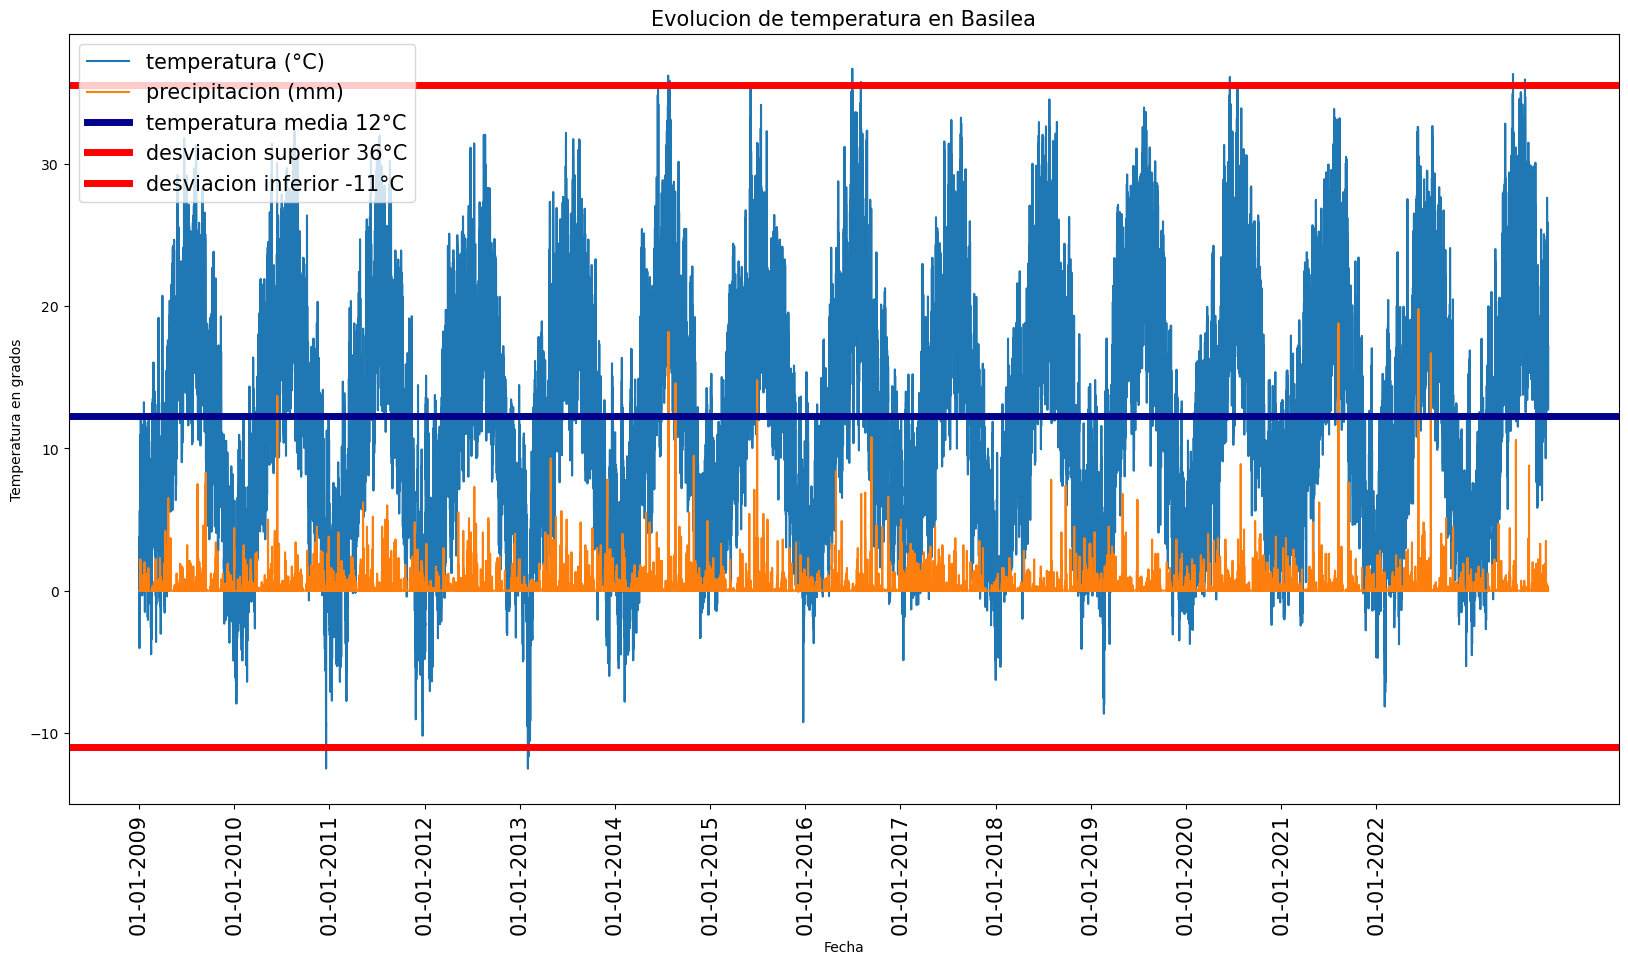

In [16]:
plt.figure(figsize=(20,10))                
plt.plot(df['temp_in_Basilea'], linestyle = '-', label='temperatura (°C)')
plt.plot(df['Basilea.1'], label='precipitacion (mm)')
plt.axhline(y=mean_temperature, linewidth = 5, c = 'darkblue', label='temperatura media ' + str(round(mean_temperature)) + '°C')
# colocamos aqui las barras que indican el rango de temperaturas normales
plt.axhline(y=ds, linewidth = 5, c = 'red', label='desviacion superior ' + str(round(ds)) + '°C')
plt.axhline(y=di, linewidth = 5, c = 'red', label='desviacion inferior ' + str(round(di)) + '°C')
plt.title('Evolucion de temperatura en Basilea', fontsize=15)
plt.xticks(value(),lookinto(),rotation=90,fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.ylabel('Temperatura en grados')
plt.xlabel('Fecha')
plt.show()